## Marker identification and distance/pose estimation

In [10]:
!pip3 install -r requirements.txt

You should consider upgrading via the 'pip install --upgrade pip' command.


## import modules and calibration data

In [11]:
import numpy as np
import cv2, PIL, os
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

drone_mtx = np.array([[1.74213359e+03, 0.00000000e+00, 1.27150514e+03],
 [0.00000000e+00, 1.74213359e+03, 1.02516982e+03],
 [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

drone_dist = np.array([[-1.69684883e+00],
 [-6.85717812e+00],
 [ 9.93624014e-03],
 [ 6.20144084e-04],
 [-1.18739065e+01],
 [-1.69460711e+00],
 [-6.99110211e+00],
 [-1.13633464e+01],
 [ 0.00000000e+00],
 [ 0.00000000e+00],
 [ 0.00000000e+00],
 [ 0.00000000e+00],
 [ 0.00000000e+00],
 [ 0.00000000e+00]])


mtx, dist = drone_mtx, drone_dist



## Marker identification

In [12]:
frame = cv2.imread("./drone detection photos/img_33.png") 

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict,
                                                      parameters=parameters)
# SUB PIXEL DETECTION
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.0001)
for corner in corners:
    cv2.cornerSubPix(gray, corner, winSize = (3,3), zeroZone = (-1,-1), criteria = criteria)

frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

size_of_marker =  0.15 # side lenght of the marker in meter
rvecs,tvecs, _objPoints = aruco.estimatePoseSingleMarkers(corners, size_of_marker , mtx, dist)

length_of_axis = 0.1
imaxis = aruco.drawDetectedMarkers(frame.copy(), corners, ids)


        

## Drawing axis and reference points

In [13]:
if tvecs is not None:
    for i in range(len(tvecs)):
        imaxis = aruco.drawAxis(imaxis, mtx, dist, rvecs[i], tvecs[i], length_of_axis)
        x = (corners[0][0][0][0] + corners[0][0][2][0])/2
        y = (corners[0][0][0][1] + corners[0][0][2][1])/2
        square_side_dimension = math.sqrt(math.pow(corners[0][0][3][1] - corners[0][0][0][1], 2) +
                                      math.pow(corners[0][0][3][0] - corners[0][0][0][0], 2))

        cv2.circle(imaxis, (int(corners[0][0][0][0]), int(corners[0][0][0][1])), 12, (255, 255, 0), 1)
        cv2.circle(imaxis, (int(corners[0][0][3][0]), int(corners[0][0][3][1])), 12, (0, 0, 255), 1)
        cv2.circle(imaxis, (int(x), int(y)), 12, (0, 255, 255), 2)
    
        

## Calculating distance between the camera and the marker

In [14]:
try:
    

    distance_cm_pc = 3317 * math.pow(square_side_dimension, -0.7468) + (-45.95)
    distance_cm_drone = 1.129e+04 * math.pow(square_side_dimension, -0.9631) + (-11.26)

    distance_cm = distance_cm_drone
    
    imaxis = cv2.putText(imaxis, str(distance_cm), (100, 200), 5, 5, (50, 255, 100))
except:
    print("non vedo")

# Results

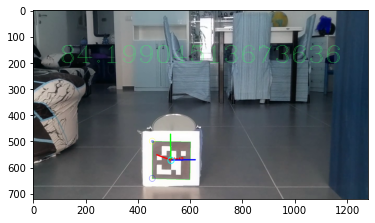

square side in pixels: 142.00269954401077
calculated distance in cm: 84.19904513673636


In [15]:
plt.imshow(imaxis, cmap = mpl.cm.gray)
plt.show()
print("square side in pixels:", square_side_dimension)
print("calculated distance in cm:", distance_cm)

Here we can see that the calculated distance is 84 cm, this is not the real distance, the real distance is 120 cm but this photo has a different resolution so the estimate is wrong. <br>
I made a video with the right resolution and distance estimate:
I used as reference the tiles in my floor, every tiles measures 60cm, and i move the drone from tile to tile. So each step is of 60cm:

In [9]:
%%HTML 
<iframe width="560" height="315" src="https://www.youtube.com/embed/dr193-LEX64" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>